In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("D:\Pritesh\ML\web scrapping\Mobile.csv")
df.head()

,Unnamed: 0,Brand,Model Name,Display Size,Operating System,Processor,Storage,RAM,Primary camera,Front Camera,Network,battery,Price
0,0,SAMSUNG,Galaxy F13,16.76 cm (6.6 inch),Android 12,Exynos 850,64 GB,4 GB,50MP + 5MP + 2MP,8MP Front Camera,"4G, 3G, 2G",6000 mAh,"₹7,499"
1,1,SAMSUNG,Galaxy F13,16.76 cm (6.6 inch),Android 12,Exynos 850,64 GB,4 GB,50MP + 5MP + 2MP,8MP Front Camera,"4G, 3G, 2G",6000 mAh,"₹7,499"
2,2,SAMSUNG,Galaxy F13,16.76 cm (6.6 inch),Android 12,Exynos 850,64 GB,4 GB,50MP + 5MP + 2MP,8MP Front Camera,"4G, 3G, 2G",6000 mAh,"₹7,499"
3,3,Apple,iPhone 15,15.49 cm (6.1 inch),iOS 17,"A16 Bionic Chip, 6 Core Processor",128 GB,NaN,48MP + 12MP,12MP Front Camera,"5G, 4G VOLTE, 4G, 3G, 2G",3349 mAh,"₹67,499"
4,4,SAMSUNG,Galaxy F04,16.51 cm (6.5 inch),Android 12,Mediatek Helio P35,64 GB,4 GB,13MP + 2MP,5MP Front Camera,"4G, 3G, 2G",5000 mAh,"₹5,999"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        979 non-null    int64 
 1   Brand             979 non-null    object
 2   Model Name        979 non-null    object
 3   Display Size      979 non-null    object
 4   Operating System  797 non-null    object
 5   Processor         600 non-null    object
 6   Storage           967 non-null    object
 7   RAM               907 non-null    object
 8   Primary camera    979 non-null    object
 9   Front Camera      595 non-null    object
 10  Network           974 non-null    object
 11  battery           969 non-null    object
 12  Price             979 non-null    object
dtypes: int64(1), object(12)
memory usage: 99.6+ KB


In [4]:
df.drop(columns='Unnamed: 0',inplace= True)

In [5]:
df.drop(columns='Model Name',inplace= True)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.Price = df.Price.str.replace("₹","")
df.Price = df.Price.str.replace(",","")
df['Price'] = df['Price'].astype(int)

In [8]:
df = df.loc[df['Price'] >= 2440]
df.shape

(378, 11)

In [9]:
df['Display Size'].value_counts()

Display Size
17.02 cm (6.7 inch)      44
16.76 cm (6.6 inch)      42
17.12 cm (6.74 inch)     38
17.07 cm (6.72 inch)     30
16.51 cm (6.5 inch)      28
17.22 cm (6.78 inch)     28
16.94 cm (6.67 inch)     23
15.49 cm (6.1 inch)      20
16.66 cm (6.56 inch)     16
16.71 cm (6.58 inch)     13
17.25 cm (6.79 inch)     13
16.33 cm (6.43 inch)     12
16.26 cm (6.4 inch)       8
16.56 cm (6.52 inch)      6
6.1 cm (2.4 inch)         6
16.54 cm (6.51 inch)      6
7.11 cm (2.8 inch)        5
17.27 cm (6.8 inch)       5
16.55 cm (6.517 inch)     4
15.75 cm (6.2 inch)       4
16.97 cm (6.68 inch)      4
16.64 cm (6.55 inch)      4
12.7 cm (5 inch)          3
16.74 cm (6.59 inch)      2
17.04 cm (6.71 inch)      2
16.59 cm (6.53 inch)      2
16.21 cm (6.38 inch)      2
4.57 cm (1.8 inch)        1
5.08 cm (2 inch)          1
17.22 cm (6.78 Inch)      1
16.0 cm (6.3 inch)        1
17.32 cm (6.82 inch)      1
17.2 cm (6.77 inch)       1
16.36 cm (6.44 inch)      1
16.87 cm (6.64 inch)      1
Name: c

In [10]:
df['Display Size'] = df['Display Size'].apply(lambda x:"".join(x.split(" ")[0]))

In [11]:
df['Operating System'].value_counts()

Operating System
Android 13                                     156
Android 12                                      68
Android Android 13.0                            18
Android Android 13                              13
iOS 17                                          11
Android 11                                      10
Android Q 12                                     8
Android Q 13                                     7
Android 14                                       6
iOS 16                                           6
Android Oxygen OxygenOS based on Android 13      5
Android 10                                       4
Android 13 Go                                    4
Android 13 (Go Edition)                          3
Android Oxygen 12                                3
Android Oxygen Android 13.1                      3
Android Oxygen 13                                3
0                                                3
Android Q 13.0                                   3
Android 12 Go 

In [12]:
def os(data):
    if 'Android' in str(data):
        return "Android"
    elif 'iOS' in str(data):
        return "iOS"
    else:
        return "Others"

df['Operating System'] = df['Operating System'].apply(os)

In [13]:
df['Processor'].unique()

array(['Exynos 850', 'A16 Bionic Chip, 6 Core Processor',
       'Mediatek Helio P35', 'A15 Bionic Chip, 6 Core Processor',
       'Dimensity 6020', 'Exynos 1330, Octa Core', 'Dimensity 7030',
       'Dimensity 7020', 'Snapdragon 4 Gen 2', 'Dimensity 6100+',
       'Helio G36', 'T612', 'Mediatek Helio G85',
       'Qualcomm Snapdragon 680', 'Helio G88', 'Qualcomm Snapdragon 695',
       'Dimensity 7200', 'T606', 'Helio G85', nan, 'Unisoc T606',
       'Dimensity 6080', 'Dimensity 7200 Ultra 5G', 'G37',
       'Dimensity 8020', 'Mediatek Helio G99', 'Dimensity 7050',
       'Mediatek Dimensity 1080', '7s Gen 2 Mobile Platform 5G',
       'Tensor G2', 'Octa Core', 'Exynos 1280', 'Mediatek Dimensity 700',
       'T616', 'Qualcomm Snapdragon 8+ Gen 1', 'Samsung Exynos 2200',
       'Snapdragon 888', 'OCTA CORE', 'Qualcomm Snapdragon 8 Gen 2',
       'Snapdragon 685', 'Google Tensor G2', 'A15 Bionic Chip',
       'Snapdragon 8 Gen 1', 'Mediatek Helio G35',
       'Qualcomm Snapdragon 4 Gen 

In [14]:
def processor(text):
    if any(m in str(text) for m in ["Dimensity", "Helio", "Mediatek"]):
        return "MediaTek"
    
    elif any(m in str(text) for m in ['Qualcomm', "Snapdragon"]):
        return 'Snapdragon'
    
    elif any(m in str(text) for m in ["Tensor", "Google"]):
        return "Google"
    
    elif any(m in str(text) for m in ['Exynos', 'Samsung']):
        return "Samsung"
    
    elif any(m in str(text) for m in ['Bionic','A17 Pro Chip']):
        return "Apple"
    
    else:
        return "Others"

df["Processor"] = df['Processor'].apply(processor)

In [15]:
df['Storage'].value_counts()

Storage
128 GB      212
256 GB       76
64 GB        58
512 GB        9
32 GB         7
32 MB         4
16 MB         3
4 MB          2
0.125 GB      2
48 MB         1
16 GB         1
8 GB          1
32+3 GB       1
Name: count, dtype: int64

In [16]:
for i in df['Storage']:
    if "MB" in str(i):
        df.loc[df['Storage'] == i, 'Storage'] = np.nan

    elif "32+3" in str(i):
        df.loc[df['Storage'] == i, 'Storage'] = '32'


df['Storage'] = df['Storage'].str.replace("GB", "")

In [17]:
df['Storage'] = df['Storage'].astype(float)
def storage(data):
    return np.nan if data<32 else data
df['Storage'] = df['Storage'].apply(storage)


In [18]:
df['RAM'].value_counts()

RAM
8 GB           138
4 GB            80
6 GB            73
12 GB           27
3 GB            12
2 GB             9
32 MB            4
16 GB            3
4 MB             2
8 MB             2
0.046875 GB      2
128 MB           1
1 GB             1
Name: count, dtype: int64

In [19]:
for i in df['RAM']:
    if "MB" in str(i):
        df.loc[df['RAM'] == i, 'RAM'] = np.nan
    elif "0." in str(i):
        df.loc[df['RAM'] == i, 'RAM'] = np.nan
    


df['RAM'] = df['RAM'].str.replace("GB", "")
df['RAM'] = df['RAM'].astype(float)
def ram(data):
    return np.nan if data<2 else data
df['RAM'] = df['RAM'].apply(ram)


In [20]:
df['RAM'].value_counts()

RAM
8.0     138
4.0      80
6.0      73
12.0     27
3.0      12
2.0       9
16.0      3
Name: count, dtype: int64

In [21]:
df['Primary camera'].value_counts()

Primary camera
50MP Rear Camera        81
50MP + 2MP              24
64MP Rear Camera        23
13MP Rear Camera        20
12MP + 12MP             13
                        ..
50MP + 50MP + 8MP        1
0.08MP Rear Camera       1
50MP + 0.3MP + 0.3MP     1
64MP (OIS) + 13MP        1
50MP + 48MP + 12MP       1
Name: count, Length: 78, dtype: int64

In [22]:
df['Primary camera'] = df['Primary camera'].str.replace("MP","")
df['Primary camera'] = df['Primary camera'].str.replace("Rear Camera","")

df['Primary camera'] = df['Primary camera'].str.split("+")

In [23]:
df['Primary camera'].value_counts()

Primary camera
[50 ]                 81
[50 ,  2]             24
[64 ]                 23
[13 ]                 20
[12 ,  12]            13
                      ..
[50 ,  50 ,  8]        1
[0.08 ]                1
[50 ,  0.3 ,  0.3]     1
[64 (OIS) ,  13]       1
[50 ,  48 ,  12]       1
Name: count, Length: 78, dtype: int64

In [24]:
df['Camera1'] = df['Primary camera'].str[0]
df['Camera2'] = df['Primary camera'].str[1]
df['Camera3'] = df['Primary camera'].str[2]
df['Camera4'] = df['Primary camera'].str[3]

In [25]:
df['Camera1'] = df['Camera1'].str.replace(" (OIS)","")
df['Camera1'] = df['Camera1'].str.replace(" Dual","")
df['Camera1'] = df['Camera1'].str.replace(" Camera","")
df['Camera1'] = df['Camera1'].str.replace(" Triple AI ","")
df['Camera1'] = df['Camera1'].str.replace("0.3","0")


In [26]:
df['Camera1'].unique()

array(['50 ', '48 ', '13 ', '12 ', '64 ', '8 ', '108 ', '108  ', '200 ',
       '100 ', '50  ', '0.08 ', '0 ', '2 ', '13', '5 ', '16 ', '32 ', '8'],
      dtype=object)

In [27]:
df['Camera2'] = df['Camera2'].str.replace(" AI Lens","0")
df['Camera2'] = df['Camera2'].str.replace("Depth Lens ","")
df['Camera2'] = df['Camera2'].str.replace("Depth Sensor ","")
df['Camera2'] = df['Camera2'].str.replace("front camera","")
df['Camera2'] = df['Camera2'].str.replace(" Depth Lens","0")


In [28]:
df['Camera2'].unique()

array([' 5 ', ' 12', ' 2', ' 13', ' 8', nan, ' 0.08', ' 8 ', '0', '0 ',
       ' 2 ', '50', ' 12 ', ' 13 ', ' 10 ', ' 0.3 ', ' 32 ', ' 50 ',
       ' 48 ', ' 0.3', ' 5', ' 64 ', ' 2  ', ' 0', ' 0.8'], dtype=object)

In [29]:
df['Camera3'].value_counts()

Camera3
 2                 63
 12                 8
 8                  8
 5                  5
 10                 3
 AI Lens            2
 2 Macro Sensor     2
 8 (OIS)            2
 48                 2
 0.3                1
 12                 1
 AI lens            1
Name: count, dtype: int64

In [30]:
df['Camera3'] = df['Camera3'].str.replace("AI Lens","0")
df['Camera3'] = df['Camera3'].str.replace(" (OIS)","")
df['Camera3'] = df['Camera3'].str.replace("Macro Sensor","")


In [31]:
df.loc[df['Camera3'] == " ", 'Camera3'] = "0"

In [32]:
df.drop(columns='Primary camera',inplace=True)
df.head()

,Brand,Display Size,Operating System,Processor,Storage,RAM,Front Camera,Network,battery,Price,Camera1,Camera2,Camera3,Camera4
0,SAMSUNG,16.76,Android,Samsung,64.0,4.0,8MP Front Camera,"4G, 3G, 2G",6000 mAh,7499,50,5,2,NaN
3,Apple,15.49,iOS,Apple,128.0,NaN,12MP Front Camera,"5G, 4G VOLTE, 4G, 3G, 2G",3349 mAh,67499,48,12,NaN,NaN
4,SAMSUNG,16.51,Android,MediaTek,64.0,4.0,5MP Front Camera,"4G, 3G, 2G",5000 mAh,5999,13,2,NaN,NaN
6,Apple,15.49,iOS,Apple,128.0,NaN,12MP Front Camera,"5G, 4G VOLTE, 4G, 3G, 2G",3279 mAh,58999,12,12,NaN,NaN
10,vivo,16.71,Android,MediaTek,128.0,8.0,8MP Front Camera,"5G, 4G, 3G",5000 mAh,14999,50,2,NaN,NaN


In [33]:
df['Front Camera'].value_counts()

Front Camera
8MP Front Camera               61
16MP Front Camera              45
5MP Front Camera               30
32MP Front Camera              28
12MP Front Camera              25
13MP Front Camera              19
50MP Front Camera              13
10MP Front Camera               5
10.5MP Front Camera             4
0MP Front Camera                3
10.8MP Front Camera             2
5MP + 5MP Dual Front Camera     1
2MP Front Camera                1
8MP + 8MP Dual Front Camera     1
0.8MP Front Camera              1
8MP + 2MP Dual Front Camera     1
Name: count, dtype: int64

In [34]:
df['Front Camera'] = df['Front Camera'].str.replace("Front Camera","")
df['Front Camera'] = df['Front Camera'].str.replace("Dual","")
df['Front Camera'] = df['Front Camera'].str.replace("MP","")
df['Front Camera'].value_counts()

Front Camera
8          61
16         45
5          30
32         28
12         25
13         19
50         13
10          5
10.5        4
0           3
10.8        2
5 + 5       1
2           1
8 + 8       1
0.8         1
8 + 2       1
Name: count, dtype: int64

In [35]:
df['Front Camera'] = df['Front Camera'].str.replace(" + 5 ","")
df['Front Camera'] = df['Front Camera'].str.replace(" + 8 ","")
df['Front Camera'] = df['Front Camera'].str.replace(" + 2 ","")
df['Front Camera'].value_counts()

Front Camera
8        63
16       45
5        31
32       28
12       25
13       19
50       13
10        5
10.5      4
0         3
10.8      2
2         1
0.8       1
Name: count, dtype: int64

In [36]:
df['Front Camera'].fillna(0,inplace=True)
df['Camera1'].fillna(0,inplace=True)
df['Camera2'].fillna(0,inplace=True)
df['Camera3'].fillna(0,inplace=True)
df['Camera4'].fillna(0,inplace=True)
df.sample(10)

,Brand,Display Size,Operating System,Processor,Storage,RAM,Front Camera,Network,battery,Price,Camera1,Camera2,Camera3,Camera4
383,REDMI,16.94,Android,Snapdragon,256.0,8.0,13,"5G, 4G VOLTE, 4G, 3G, 2G",5000 mAh,18999,48,8,2,0
122,realme,17.02,Android,MediaTek,256.0,8.0,32,"5G, 4G VOLTE, 4G, 3G, 2G",5000 mAh,25999,200,8,2,0
555,Nokia,6.1,Others,Others,NaN,NaN,0,"4G, 3G, 2G",1450 mAh,4699,0,0,0,0
418,Infinix,17.32,Android,Others,64.0,4.0,8,"4G, 3G, 2G",6000 mAh,7499,50,0,0,0
172,Apple,17.02,iOS,Apple,128.0,NaN,12,"5G, 4G VOLTE, 4G, 3G, 2G",4323 mAh,65999,12,12,0,0
51,REDMI,17.25,Android,MediaTek,128.0,4.0,8,"2G, 3G, 4G, 4G VOLTE",5000 mAh,9499,50,8,2,0
718,OnePlus,16.33,Android,Others,128.0,8.0,0,5G,4500 mAh,22785,64,0,0,0
345,vivo,17.22,Android,Snapdragon,256.0,8.0,50,"2G, 3G, 4G, 5G",5000 mAh,28999,64,8,0,0
275,vivo,16.71,Android,MediaTek,128.0,8.0,16,"5G, 4G, 3G, 2G",5000 mAh,17999,50,2,0,0
131,Google,15.49,Android,Google,128.0,8.0,13,5G,4300 mAh,38999,64,13,0,0


In [37]:
df['battery'] = df['battery'].str.replace("mAh",'')

In [38]:
df['battery'].dropna(inplace=True)

In [39]:
df['Network'].value_counts()

Network
5G                          78
5G, 4G, 3G, 2G              44
5G, 4G VOLTE, 4G, 3G, 2G    43
4G, 3G, 2G                  41
2G, 3G, 4G, 5G              29
4G VOLTE                    25
4G                          21
2G, 3G, 4G                  19
4G VOLTE, 4G, 3G, 2G        15
4G VOLTE, 4G                13
2G, 3G, 4G, 4G VOLTE         8
2G, 3G, 4G, 4G VOLTE, 5G     8
2G                           8
5G, 4G, 3G                   7
3G, 4G, 5G                   5
5G, 4G VOLTE, 4G             3
4G, 4G VOLTE                 3
5G, 4G VOLTE                 3
5G, 4G                       2
2G, 3G, 4G VOLTE, 5G         2
Name: count, dtype: int64

In [40]:
df['Network'] = df['Network'].str.replace("VOLTE", '').str.replace("G", '')

In [41]:
df['Network'] = df['Network'].apply(lambda x: max(str(x).split(',')) if pd.notna(x) else x)

In [42]:
df

,Brand,Display Size,Operating System,Processor,Storage,RAM,Front Camera,Network,battery,Price,Camera1,Camera2,Camera3,Camera4
0,SAMSUNG,16.76,Android,Samsung,64.0,4.0,8,4,6000,7499,50,5,2,0
3,Apple,15.49,iOS,Apple,128.0,NaN,12,5,3349,67499,48,12,0,0
4,SAMSUNG,16.51,Android,MediaTek,64.0,4.0,5,4,5000,5999,13,2,0,0
6,Apple,15.49,iOS,Apple,128.0,NaN,12,5,3279,58999,12,12,0,0
10,vivo,16.71,Android,MediaTek,128.0,8.0,8,5,5000,14999,50,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,Nokia,16.55,Android,Others,64.0,4.0,8,4,5000,7869,50,2,0,0
967,vivo,16.71,Android,MediaTek,128.0,8.0,16,4,5000,13999,50,2,2,0
970,LAVA,16.66,Android,Others,128.0,6.0,0,5,5000,11449,50,0,0,0
971,Apple,17.02,iOS,Apple,512.0,NaN,12,5,4422,176900,48,12,12,0


In [43]:
df.loc[df['Brand'] == 'Apple', 'RAM'].fillna(6, inplace=True)

In [44]:
df['Storage'].fillna(df['Storage'].median(),inplace = True)
df['RAM'].fillna(df['RAM'].median(),inplace = True)

In [49]:
df['Camera3'] = df['Camera3'].str.replace('AI lens','0')

In [50]:
df['Display Size'] = df['Display Size'].astype(float)
df['Front Camera'] = df['Front Camera'].astype(float)
df['Network'] = df['Network'].astype(float)
df['battery'] = df['battery'].astype(float)
df['Camera1'] = df['Camera1'].astype(float)
df['Camera2'] = df['Camera2'].astype(float)
df['Camera3'] = df['Camera3'].astype(float)
df['Camera4'] = df['Camera4'].astype(float)

In [51]:
df['battery'].fillna(df['battery'].mean(),inplace = True)
df['Network'].fillna(df['Network'].median(),inplace = True)

In [52]:
df['Camera3'].fillna(0,inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 0 to 976
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             378 non-null    object 
 1   Display Size      378 non-null    float64
 2   Operating System  378 non-null    object 
 3   Processor         378 non-null    object 
 4   Storage           378 non-null    float64
 5   RAM               378 non-null    float64
 6   Front Camera      378 non-null    float64
 7   Network           378 non-null    float64
 8   battery           378 non-null    float64
 9   Price             378 non-null    int32  
 10  Camera1           378 non-null    float64
 11  Camera2           378 non-null    float64
 12  Camera3           378 non-null    float64
 13  Camera4           378 non-null    float64
dtypes: float64(10), int32(1), object(3)
memory usage: 42.8+ KB


<Axes: >

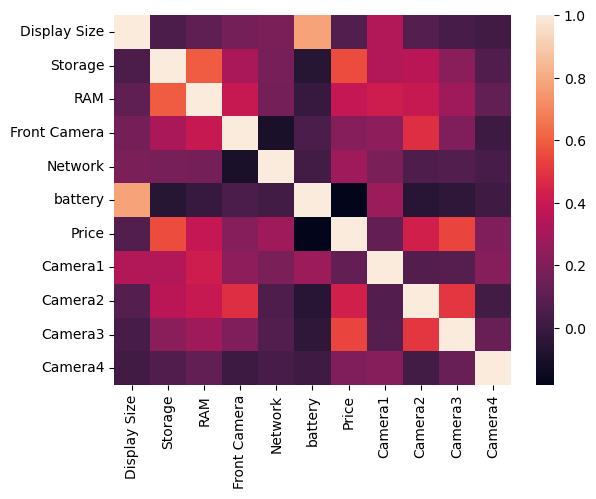

In [54]:
sns.heatmap(df.corr(numeric_only=True))

C:\Users\admin\AppData\Local\Temp\ipykernel_17308\824416946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price)


<Axes: xlabel='Price', ylabel='Density'>

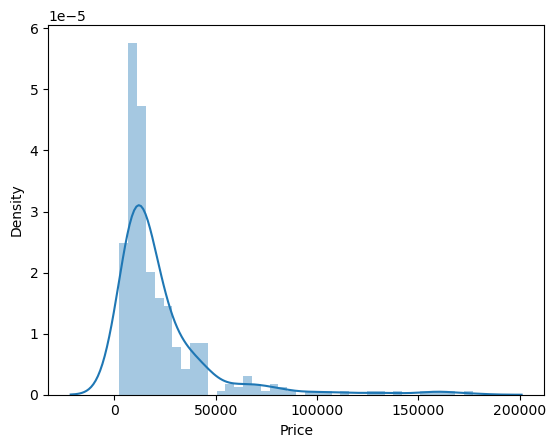

In [55]:
sns.distplot(df.Price)

<Axes: xlabel='Processor'>

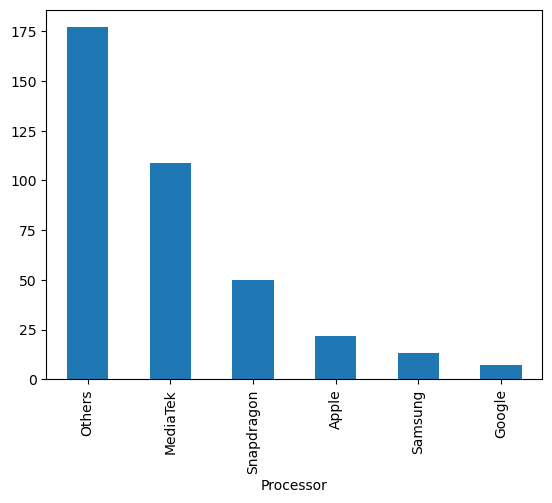

In [56]:
df['Processor'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Brand'>

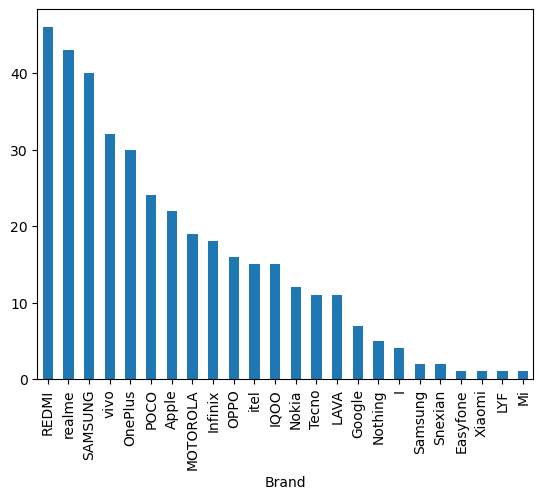

In [57]:
df['Brand'].value_counts().plot(kind = 'bar')

In [63]:
df['Brand'] = df['Brand'].str.replace("Mi",'REDMI')
df['Brand'] = df['Brand'].str.replace("Xiaomi",'REDMI')
df['Brand'] = df['Brand'].str.replace("Samsung",'SAMSUNG')
df['Brand'] = df['Brand'].str.replace("Easyfone",'Others')
df['Brand'] = df['Brand'].str.replace("LYF",'Others')
df['Brand'] = df['Brand'].str.replace("Snexian",'Others')
df['Brand'] = df['Brand'].str.replace(r'\bI\b','Others',regex=True)


<Axes: xlabel='Brand'>

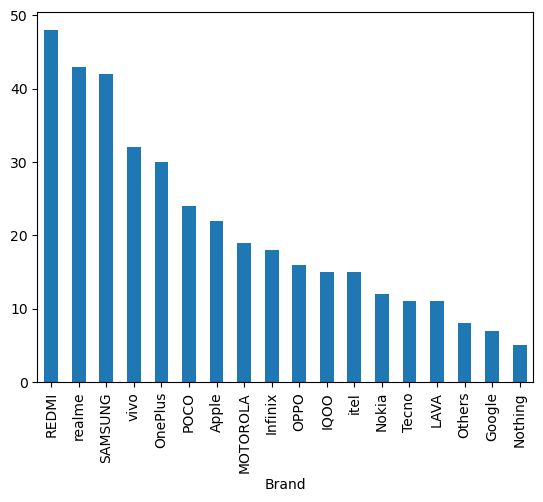

In [64]:
df['Brand'].value_counts().plot(kind = 'bar')

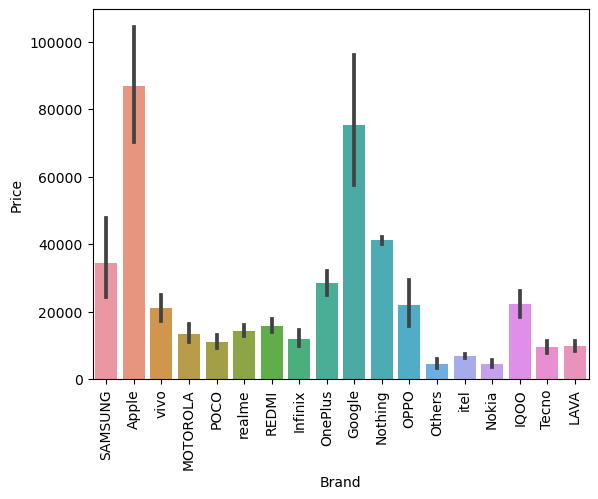

In [65]:
sns.barplot(x=df.Brand,y=df.Price)
plt.xticks(rotation = 'vertical')
plt.show()

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

C:\Users\admin\AppData\Local\Temp\ipykernel_17308\3309387210.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y)


<Axes: xlabel='Price', ylabel='Density'>

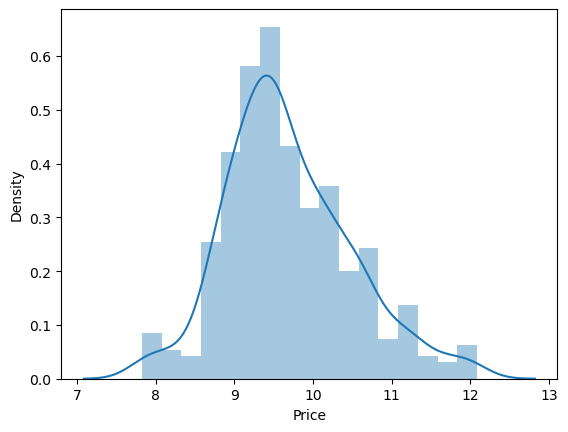

In [67]:
X= df.drop(columns="Price")
Y = np.log(df['Price'])
sns.distplot(Y)

In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=83)

In [69]:
X_train

,Brand,Display Size,Operating System,Processor,Storage,RAM,Front Camera,Network,battery,Camera1,Camera2,Camera3,Camera4
752,Apple,15.49,iOS,Apple,512.0,6.0,12.0,5.0,4804.820856,12.0,12.0,0.0,0.0
230,Infinix,17.22,Android,MediaTek,128.0,4.0,8.0,2.0,6000.000000,50.0,0.0,0.0,0.0
182,SAMSUNG,16.26,Android,Snapdragon,128.0,8.0,32.0,5.0,4500.000000,12.0,12.0,8.0,0.0
200,REDMI,17.12,Android,Others,128.0,6.0,0.0,4.0,5000.000000,50.0,0.0,0.0,0.0
244,vivo,17.22,Android,Others,128.0,8.0,50.0,3.0,4600.000000,50.0,8.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,vivo,16.71,Android,MediaTek,128.0,8.0,16.0,4.0,5000.000000,50.0,2.0,2.0,0.0
565,LAVA,16.51,Android,Others,64.0,4.0,0.0,4.0,5000.000000,13.0,0.0,0.0,0.0
687,Nokia,7.11,Others,Others,128.0,6.0,0.0,2.0,1150.000000,0.0,0.0,0.0,0.0
44,REDMI,17.25,Android,MediaTek,128.0,6.0,8.0,2.0,5000.000000,50.0,8.0,2.0,0.0


In [70]:
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,2,3])
],remainder='passthrough')
step_2  = LinearRegression()
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.859157460083176
MAE 0.20607834390962054


In [71]:
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first',handle_unknown="ignore"),[0,2,3])
],remainder='passthrough')
step_2  = RandomForestRegressor()
pipe_rf = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe_rf.fit(X_train,Y_train)
y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.923126185857497
MAE 0.15468037086845163


In [72]:
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,2,3])
],remainder='passthrough')
step_2  = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8672111177620666
MAE 0.2111942192913057


In [73]:
from sklearn.tree import DecisionTreeRegressor
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,2,3])
],remainder='passthrough')
step_2  = DecisionTreeRegressor()
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8637777222222037
MAE 0.1843444389601132


In [74]:
def best_rs(X,Y):
    r2_score_ =[]
    try:
        for i in range(1,100):
            X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=i)
            pipe_rf.fit(X_train,Y_train)
            y_pred = pipe_rf.predict(X_test)
            r2_score_.append(r2_score(Y_test,y_pred))
        return r2_score_
    except ValueError as e:
        print("error")

In [75]:
import warnings
warnings.simplefilter("ignore") 

In [102]:
result = best_rs(X,Y)
print(np.argmax(result))

40


In [76]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=41)
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first',handle_unknown="ignore"),[0,2,3])
],remainder='passthrough')
step_2  = RandomForestRegressor()
pipe_rf = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe_rf.fit(X_train,Y_train)
y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.9688522580878822
MAE 0.1174899918057131


In [77]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(pipe_rf, X_train, Y_train, cv=kf)

print("Cross-Validation Scores:", cross_val_scores)

Cross-Validation Scores: [0.9117195  0.8929515  0.9259628  0.91946221 0.88327025]


In [78]:
import pickle

pickle.dump(df,open('df_mobile.pkl','wb'))
pickle.dump(pipe_rf,open('pipe_rf_mobile.pkl','wb'))
